# MNIST 

The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size 28x28 resolution images. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

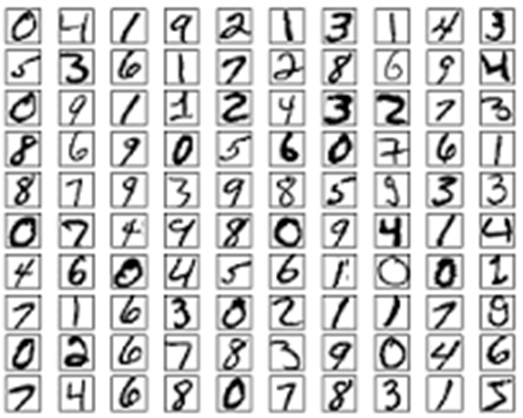

## Importing the required libraries

In [85]:
from tensorflow import keras as k
import numpy as np 
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Flatten,Dropout
from keras.utils import to_categorical

In [97]:
### getting the data into train and test set
(x_train,y_train),(x_test,y_test) = k.datasets.mnist.load_data()

In [98]:
# Check the dimensions of the arrays
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('x_test shape:  ',x_test.shape)
print('y_test shape:  ',y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:   (10000, 28, 28)
y_test shape:   (10000,)


In [99]:
### converting the input shape to (28,28,1)
### MNIST data is black-white image , so we use 1
###                if color image , we use 3
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [100]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [101]:
## 'to_categorical' converts the class lebels to one-hot vectors. One-hot vector is nothing but dummifying in R.

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [103]:
# Sequential is a container which stores the layers in order. 
model = Sequential() # This initializes a sequential model to which you we can keep adding layers.
model.add(Conv2D(filters=28,kernel_size=(3,3),activation='relu',input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
# Building a 2 hidden layer MLP
model.add(Dense(200,activation='relu')) # Add a dense layer 
model.add(Dropout(rate = 0.2))
model.add(Dense(10, activation='softmax'))

In [104]:
model.compile(loss='categorical_crossentropy', # CrossEntropy is the loss function. 
              optimizer='adam',                  # Mention the optimizer
              metrics=['accuracy'])            # Mention the metric to be printed while training

In [105]:
nb_epochs = 10
bt_size = 64
# training the MLP model
history = model.fit(x_train, y_train, epochs=nb_epochs, batch_size=bt_size, validation_split=0.1) 

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 58s 1ms/step - loss: 0.2035 - acc: 0.9389 - val_loss: 0.0690 - val_acc: 0.9807
Epoch 2/10
54000/54000 [==============================] - 58s 1ms/step - loss: 0.0672 - acc: 0.9794 - val_loss: 0.0503 - val_acc: 0.9875
Epoch 3/10
54000/54000 [==============================] - 58s 1ms/step - loss: 0.0454 - acc: 0.9854 - val_loss: 0.0461 - val_acc: 0.9873
Epoch 4/10
54000/54000 [==============================] - 69s 1ms/step - loss: 0.0310 - acc: 0.9901 - val_loss: 0.0405 - val_acc: 0.9890
Epoch 5/10
54000/54000 [==============================] - 65s 1ms/step - loss: 0.0262 - acc: 0.9915 - val_loss: 0.0362 - val_acc: 0.9888
Epoch 6/10
54000/54000 [==============================] - 66s 1ms/step - loss: 0.0187 - acc: 0.9939 - val_loss: 0.0401 - val_acc: 0.9892
Epoch 7/10
54000/54000 [==============================] - 69s 1ms/step - loss: 0.0161 - acc: 0.9949 - val_loss: 0.0379 - val_acc:

In [106]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 200)               946600    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2010      
Total params: 948,890
Trainable params: 948,890
Non-trainable params: 0
_________________________________________________________________


In [108]:
train_acc = history.history['acc']
train_loss = history.history['loss']
print("train accuracy for each epoch : ",train_acc)
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

train accuracy for each epoch :  [0.9388703703527097, 0.9794259259435866, 0.9854259259435866, 0.9901111111111112, 0.9915185185008579, 0.9938518518518519, 0.9948703703703704, 0.995907407425068, 0.9961296296296296, 0.9967777777777778]


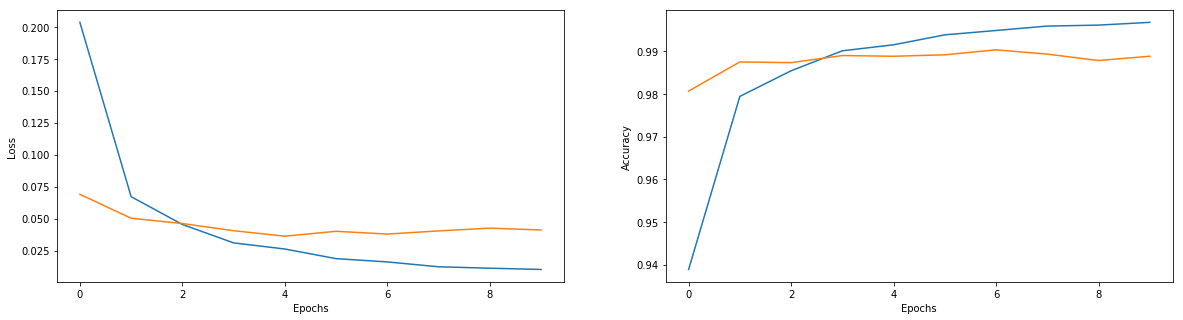

In [109]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)

### Evaluate on Test Data

1. Which we give output as loss function and accuracy

2. to predit on new image us model.predict 


In [110]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 328us/step


[0.045039800899762124, 0.9867]

In [111]:
## Save the model
model.save('mnist_model.h5')